In [9]:
#import our data 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
import time

data  = os.path.join("c:", os.sep, "Users", "Pavlos", "Desktop","Leeds","University of Leeds","Year 3","Deep Learning for Medical Image Classification","train")
cat = ["Normal","Pneumonia"]
cattest = []
img_size = 50
train_data = []
for category in cat:
    path = os.path.join(data,category) #path to chest or abd
    class_num = cat.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        train_data.append([new_array,class_num])    

x = [] #train data
y = [] #train labels
for features, label in train_data:
    x.append(features)
    y.append(label)
x = np.array(x)
y = np.array(y)

In [10]:
#reshape our data and set the figure aesthetics
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 124

x = x[:,:,:,-3]
x_reshape = np.reshape(x,(2430,2500))

In [11]:
#start PCA process
time_start = time.time()
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_reshape)
print ('Time elapsed: {} seconds'.format(time.time()-time_start))
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])
pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
top_two_comp = pca_df[['pca1','pca2']] 

Time elapsed: 0.31106019020080566 seconds
Variance explained per principal component: [0.22128215 0.10041321 0.07816909 0.04648308]


(<Figure size 576x576 with 1 Axes>,
 [Text(-158.39737562418088, -157.70417523543696, '0'),
  Text(88.1923987916583, 106.49715398277793, '1')])

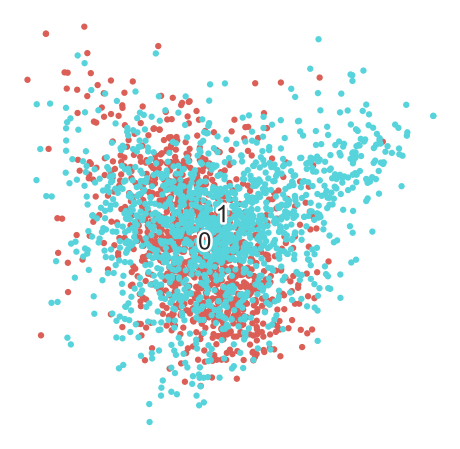

In [13]:
#define a function that visualises the outcome
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.xlabel('pca1')
    plt.ylabel('pca2')
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return f, ax, sc, txts

fashion_scatter(top_two_comp.values,y) # Visualizing the PCA output

Time elapsed: 50.025294065475464 seconds
Time elapsed: 48.56353449821472 seconds
Time elapsed: 56.26972246170044 seconds
Time elapsed: 63.95032453536987 seconds


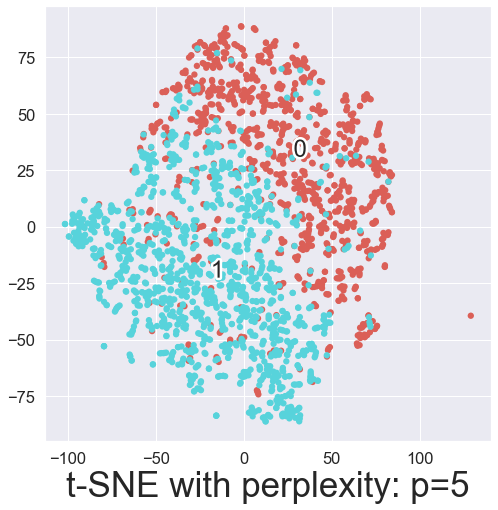

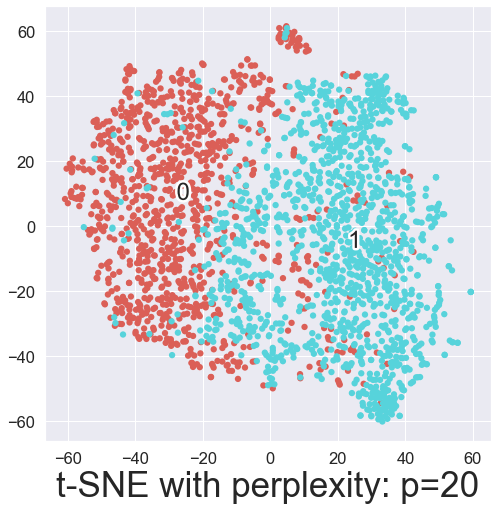

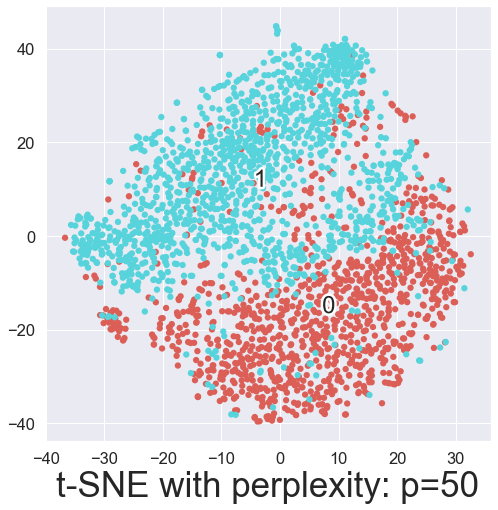

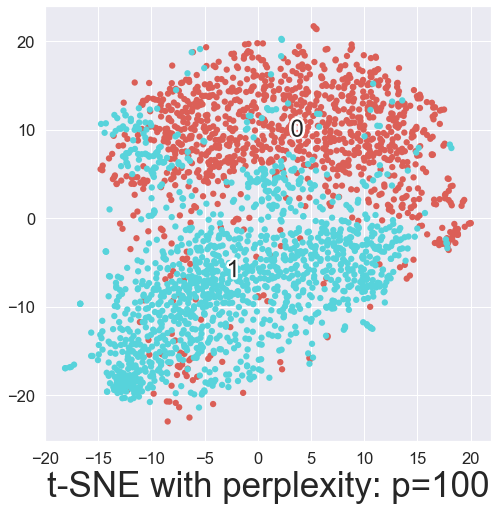

In [14]:
# plot t-SNE for different values of perplexity 
def fashion_scatter_tsne(i, x, colors):
   
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # create a scatter plot.    
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#    ax.axis('off')
    ax.axis('tight')
    plt.xlabel('t-SNE with perplexity: p=%i' %i,size=35)
    txts = []

    for i in range(num_classes):


        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return fig, ax, sc, txts

for i in [5,20,50,100]:
    time_start = time.time()
    fashion_tsne = TSNE(n_components=2, perplexity = i , random_state=RS).fit_transform(x_reshape)
    print ('Time elapsed: {} seconds'.format(time.time()-time_start))
    fashion_scatter_tsne(i, fashion_tsne, y)
    #fig.savefig('tsneper.png', pad_inches = 0)
    plt.savefig("tsneper %i" %i  )
plt.show()